In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
sys.path.append(os.path.expanduser('~/rds/rds-dsk-lab-eWkDxBhxBrQ/dimorl/code/mopo'))

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dogo.constants import FIG_DIR
from dogo.results import get_scores_df
from dogo.wasserstein.wasserstein_distance import experiment_combination_distances

In [35]:
plt.rc('font', size=22)
cols = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
lss =  ['-', '--']

In [5]:
evaluation_datasets_lables = [
    ("D3RLPY-RT-0.1M-4-P0_10000", "D3RLPY: 0.1M"),
    ("D3RLPY-RT-0.2M-4-P0_10000", "D3RLPY: 0.2M"),
    ("D3RLPY-RT-0.5M-4-P0_10000", "D3RLPY: 0.5M"),
    ("D3RLPY-RT-1M-4-P0_10000", "D3RLPY: 1M"),
    ("D3RLPY-RT-2M-4-P0_10000", "D3RLPY: 2M"),
    # ("D3RLPY-RT-0.1M-2-P0_10000", "D3RLPY 2 - 0.1M Steps"),
    # ("D3RLPY-RT-0.2M-2-P0_10000", "D3RLPY 2 - 0.2M Steps"),
    # ("D3RLPY-RT-0.5M-2-P0_10000", "D3RLPY 2 - 0.5M Steps"),
    # ("D3RLPY-RT-1M-2-P0_10000", "D3RLPY 2 - 1M Steps"),
    # ("D3RLPY-RT-2M-2-P0_10000", "D3RLPY 2 - 2M Steps"),
    # ("D3RLPY-RT-0.1M-3-P0_10000", "D3RLPY 3 - 0.1M Steps"),
    # ("D3RLPY-RT-0.2M-3-P0_10000", "D3RLPY 3 - 0.2M Steps"),
    # ("D3RLPY-RT-0.5M-3-P0_10000", "D3RLPY 3 - 0.5M Steps"),
    # ("D3RLPY-RT-1M-3-P0_10000", "D3RLPY 3 - 1M Steps"),
    # ("D3RLPY-RT-2M-3-P0_10000", "D3RLPY 3 - 2M Steps"),
    ("SAC-RT-0.1M-4-P0_10000", "SL: 0.1M"),
    ("SAC-RT-0.25M-4-P0_10000", "SL: 0.25M"),
    ("SAC-RT-0.5M-4-P0_10000", "SL: 0.5M"),
    ("SAC-RT-1M-4-P0_10000", "SL: 1M"),
    ("SAC-RT-2M-4-P0_10000", "SL: 2M"),
    ("SAC-RT-3M-4-P0_10000", "SL: 3M"),
    # ("SAC-RT-0.25M-2-P0_10000", "Softlearning 2 - 0.25M Steps"),
    # ("SAC-RT-0.5M-2-P0_10000", "Softlearning 2 - 0.5M Steps"),
    # ("SAC-RT-1M-2-P0_10000", "Softlearning 2 - 1M Steps"),
    # ("SAC-RT-2M-2-P0_10000", "Softlearning 2 - 2M Steps"),
    # ("SAC-RT-3M-2-P0_10000", "Softlearning 2 - 3M Steps"),
    # ("SAC-RT-0.25M-3-P0_10000", "Softlearning 3 - 0.25M Steps"),
    # ("SAC-RT-0.5M-3-P0_10000", "Softlearning 3 - 0.5M Steps"),
    # ("SAC-RT-1M-3-P0_10000", "Softlearning 3 - 1M Steps"),
    # ("SAC-RT-2M-3-P0_10000", "Softlearning 3 - 2M Steps"),
    # ("SAC-RT-3M-3-P0_10000", "Softlearning 3 - 3M Steps"),
    ("D4RL-HC-M_10000", "D4RL: M"),
    ("D4RL-HC-ME_10000", "D4RL: ME"),
    ("D4RL-HC-MR_10000", "D4RL: MR"),
    ("D4RL-HC-R_10000", "D4RL: R"),
    ("RAND-1_10000", "Random 1"),
    ("RAND-2_10000", "Random 2"),
    ("RAND-3_10000", "Random 3"),
]
evaluation_datasets = [i[0] for i in evaluation_datasets_lables]
evaluation_labels = [i[1] for i in evaluation_datasets_lables]

easy_dataset_lables = [
    ("D3RLPY-RT-0.1M-4-P0_10000", "D3RLPY: 0.1M"),
    ("D3RLPY-RT-0.2M-4-P0_10000", "D3RLPY: 0.2M"),
    ("D3RLPY-RT-0.5M-4-P0_10000", "D3RLPY: 0.5M"),
    ("SAC-RT-0.25M-4-P0_10000", "SL: 0.25M"),
    ("SAC-RT-0.5M-4-P0_10000", "SL: 0.5M"),
    # ("D3RLPY-RT-1M-4-P0_10000", "D3RLPY: 1M Steps"),
    # ("D3RLPY-RT-2M-4-P0_10000", "D3RLPY: 2M Steps"),
]
easy_datasets = [i[0] for i in easy_dataset_lables]
easy_labels = [i[1] for i in easy_dataset_lables]

hard_dataset_lables = [
    # ("D3RLPY-RT-0.1M-4-P0_10000", "D3RLPY 1 - 0.1M Steps"),
    # ("D3RLPY-RT-0.2M-4-P0_10000", "D3RLPY 1 - 0.2M Steps"),
    # ("D3RLPY-RT-0.5M-4-P0_10000", "D3RLPY 1 - 0.5M Steps"),
    # ("D3RLPY-RT-1M-4-P0_10000", "D3RLPY 1 - 1M Steps"),
    # ("D3RLPY-RT-2M-4-P0_10000", "D3RLPY 1 - 2M Steps"),
    # ("D3RLPY-RT-0.1M-2-P0_10000", "D3RLPY 2 - 0.1M Steps"),
    # ("D3RLPY-RT-0.2M-2-P0_10000", "D3RLPY 2 - 0.2M Steps"),
    # ("D3RLPY-RT-0.5M-2-P0_10000", "D3RLPY 2 - 0.5M Steps"),
    # ("D3RLPY-RT-1M-2-P0_10000", "D3RLPY 2 - 1M Steps"),
    # ("D3RLPY-RT-2M-2-P0_10000", "D3RLPY 2 - 2M Steps"),
    # ("D3RLPY-RT-0.1M-3-P0_10000", "D3RLPY 3 - 0.1M Steps"),
    # ("D3RLPY-RT-0.2M-3-P0_10000", "D3RLPY 3 - 0.2M Steps"),
    # ("D3RLPY-RT-0.5M-3-P0_10000", "D3RLPY 3 - 0.5M Steps"),
    # ("D3RLPY-RT-1M-3-P0_10000", "D3RLPY 3 - 1M Steps"),
    # ("D3RLPY-RT-2M-3-P0_10000", "D3RLPY 3 - 2M Steps"),
    # ("D4RL-HC-M_10000", "D4RL Medium"),
    ("D4RL-HC-ME_10000", "D4RL: Medium-Expert"),
    ("D4RL-HC-MR_10000", "D4RL: Medium-Replay"),
    ("D4RL-HC-R_10000", "D4RL Random"),
    # ("SAC-RT-0.1M-4-P0_10000", "Softlearning 1 - 0.1M Steps"),
    # ("SAC-RT-0.25M-4-P0_10000", "Softlearning 1 - 0.25M Steps"),
    # ("SAC-RT-0.5M-4-P0_10000", "Softlearning 1 - 0.5M Steps"),
    # ("SAC-RT-1M-4-P0_10000", "Softlearning 1 - 1M Steps"),
    ("SAC-RT-2M-4-P0_10000", "SL: 2M Steps"),
    ("SAC-RT-3M-4-P0_10000", "SL: 3M Steps"),
    # ("SAC-RT-0.25M-2-P0_10000", "Softlearning 2 - 0.25M Steps"),
    # ("SAC-RT-0.5M-2-P0_10000", "Softlearning 2 - 0.5M Steps"),
    # ("SAC-RT-1M-2-P0_10000", "Softlearning 2 - 1M Steps"),
    # ("SAC-RT-2M-2-P0_10000", "SL 2: 2M Steps"),
    # ("SAC-RT-3M-2-P0_10000", "SL 2: 3M Steps"),
    # ("SAC-RT-0.25M-3-P0_10000", "Softlearning 3 - 0.25M Steps"),
    # ("SAC-RT-0.5M-3-P0_10000", "Softlearning 3 - 0.5M Steps"),
    # ("SAC-RT-1M-3-P0_10000", "Softlearning 3 - 1M Steps"),
    # ("SAC-RT-2M-3-P0_10000", "Softlearning 3 - 2M Steps"),
    # ("SAC-RT-3M-3-P0_10000", "Softlearning 3 - 3M Steps"),
    # ("RAND-1_10000", "Random Policy 1"),
    # ("RAND-2_10000", "Random Policy 2"),
    ("RAND-3_10000", "Random"),
]
hard_datasets = [i[0] for i in hard_dataset_lables]
hard_labels = [i[1] for i in hard_dataset_lables]

training_datasets_labels = [
    ("RAND-2_10000", "Random Policy 2"),
    ("RAND-9_10000", "Random Policy 9"),
    ("D3RLPY-MP4-P4_10000", "100k Training Steps - Full Episodes"),
    ("D3RLPY-MP5-P1_10000", "20k Training Steps - Full Episodes"),
    ("D3RLPY-PAP9-P0_10000", "100k Training Steps - First 200 Episode Steps"),
]
training_datasets = [i[0] for i in training_datasets_labels]
training_labels = [i[1] for i in training_datasets_labels]

d3rlpy_datasets_labels = [
    ("D3RLPY-RT-0.1M-4-P0_10000", "0.1M Steps"),
    ("D3RLPY-RT-0.2M-4-P0_10000", "0.2M Steps"),
    ("D3RLPY-RT-0.5M-4-P0_10000", "0.5M Steps"),
    ("D3RLPY-RT-1M-4-P0_10000", "1M Steps"),
    ("D3RLPY-RT-2M-4-P0_10000", "2M Steps"),
]
d3rlpy_datasets = [i[0] for i in d3rlpy_datasets_labels]
d3rlpy_labels = [i[1] for i in d3rlpy_datasets_labels]

novice_datasets_labels = [
    ("RAND-2_10000", "Random Policy 2"),
    ("D3RLPY-RT-0.1M-4-P0_10000", "D3RLPY: 0.1M Steps"),
]
novice_datasets = [i[0] for i in novice_datasets_labels]
novice_labels = [i[1] for i in novice_datasets_labels]

experienced_datasets_labels = [
    ("RAND-2_10000", "Random Policy 2"),
    ("SAC-RT-0.25M-4-P0_10000", "Softlearning 1\n0.25M Steps"),
    ("SAC-RT-1M-4-P0_10000", "Softlearning 1\n1M Steps"),
    ("D3RLPY-RT-0.2M-4-P0_10000", "D3RLPY 1\n0.2M Steps"),
    ("D3RLPY-RT-2M-4-P0_10000", "D3RLPY 1\n2M Steps"),
]
experienced_datasets = [i[0] for i in experienced_datasets_labels]
experienced_labels = [i[1] for i in experienced_datasets_labels]

experiments_no_rex = ['MP329', 'MP330', 'MP331']
experiments_rex_01 = ['MP332', 'MP333', 'MP334']
experiments_rex_1  = ['MP335', 'MP336', 'MP337']
experiments_rex_5  = ['MP723', 'MP724', 'MP725']
experiments_rex_10 = ['MP338', 'MP339', 'MP340']

experiments_no_rex_retrain = ['MP874', 'MP875', 'MP876']
experiments_rex_10_retrain = ['MP877', 'MP878', 'MP879']

labels = ['No REx', 'REx: $\\beta=0.1$', 'REx: $\\beta=1.0$', 'REx: $\\beta=5.0$', 'REx: $\\beta=10.0$']

In [6]:
scores_no_rex_df = get_scores_df(experiments_no_rex, evaluation_datasets)
scores_rex_01_df = get_scores_df(experiments_rex_01, evaluation_datasets)
scores_rex_1_df = get_scores_df(experiments_rex_1, evaluation_datasets)
scores_rex_5_df = get_scores_df(experiments_rex_5, evaluation_datasets)
scores_rex_10_df = get_scores_df(experiments_rex_10, evaluation_datasets)

scores_no_rex_df_retrain = get_scores_df(experiments_no_rex_retrain, evaluation_datasets)
scores_rex_10_df_retrain = get_scores_df(experiments_rex_10_retrain, evaluation_datasets)

In [7]:
scores_no_rex_groups = (
    scores_no_rex_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_no_rex_avgs_df = scores_no_rex_groups.mean().reset_index()
scores_no_rex_mins_df = scores_no_rex_groups.min().reset_index()
scores_no_rex_maxs_df = scores_no_rex_groups.max().reset_index()

scores_rex_01_groups = (
    scores_rex_01_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_rex_01_avgs_df = scores_rex_01_groups.mean().reset_index()
scores_rex_01_mins_df = scores_rex_01_groups.min().reset_index()
scores_rex_01_maxs_df = scores_rex_01_groups.max().reset_index()

scores_rex_1_groups = (
    scores_rex_1_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_rex_1_avgs_df = scores_rex_1_groups.mean().reset_index()
scores_rex_1_mins_df = scores_rex_1_groups.min().reset_index()
scores_rex_1_maxs_df = scores_rex_1_groups.max().reset_index()

scores_rex_5_groups = (
    scores_rex_5_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_rex_5_avgs_df = scores_rex_5_groups.mean().reset_index()
scores_rex_5_mins_df = scores_rex_5_groups.min().reset_index()
scores_rex_5_maxs_df = scores_rex_5_groups.max().reset_index()

scores_rex_10_groups = (
    scores_rex_10_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_rex_10_avgs_df = scores_rex_10_groups.mean().reset_index()
scores_rex_10_mins_df = scores_rex_10_groups.min().reset_index()
scores_rex_10_maxs_df = scores_rex_10_groups.max().reset_index()

In [8]:
scores_no_rex_groups_retrain = (
    scores_no_rex_df_retrain.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_no_rex_avgs_df_retrain = scores_no_rex_groups_retrain.mean().reset_index()
scores_no_rex_mins_df_retrain = scores_no_rex_groups_retrain.min().reset_index()
scores_no_rex_maxs_df_retrain = scores_no_rex_groups_retrain.max().reset_index()

scores_rex_10_groups_retrain = (
    scores_rex_10_df_retrain.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_rex_10_avgs_df_retrain = scores_rex_10_groups_retrain.mean().reset_index()
scores_rex_10_mins_df_retrain = scores_rex_10_groups_retrain.min().reset_index()
scores_rex_10_maxs_df_retrain = scores_rex_10_groups_retrain.max().reset_index()

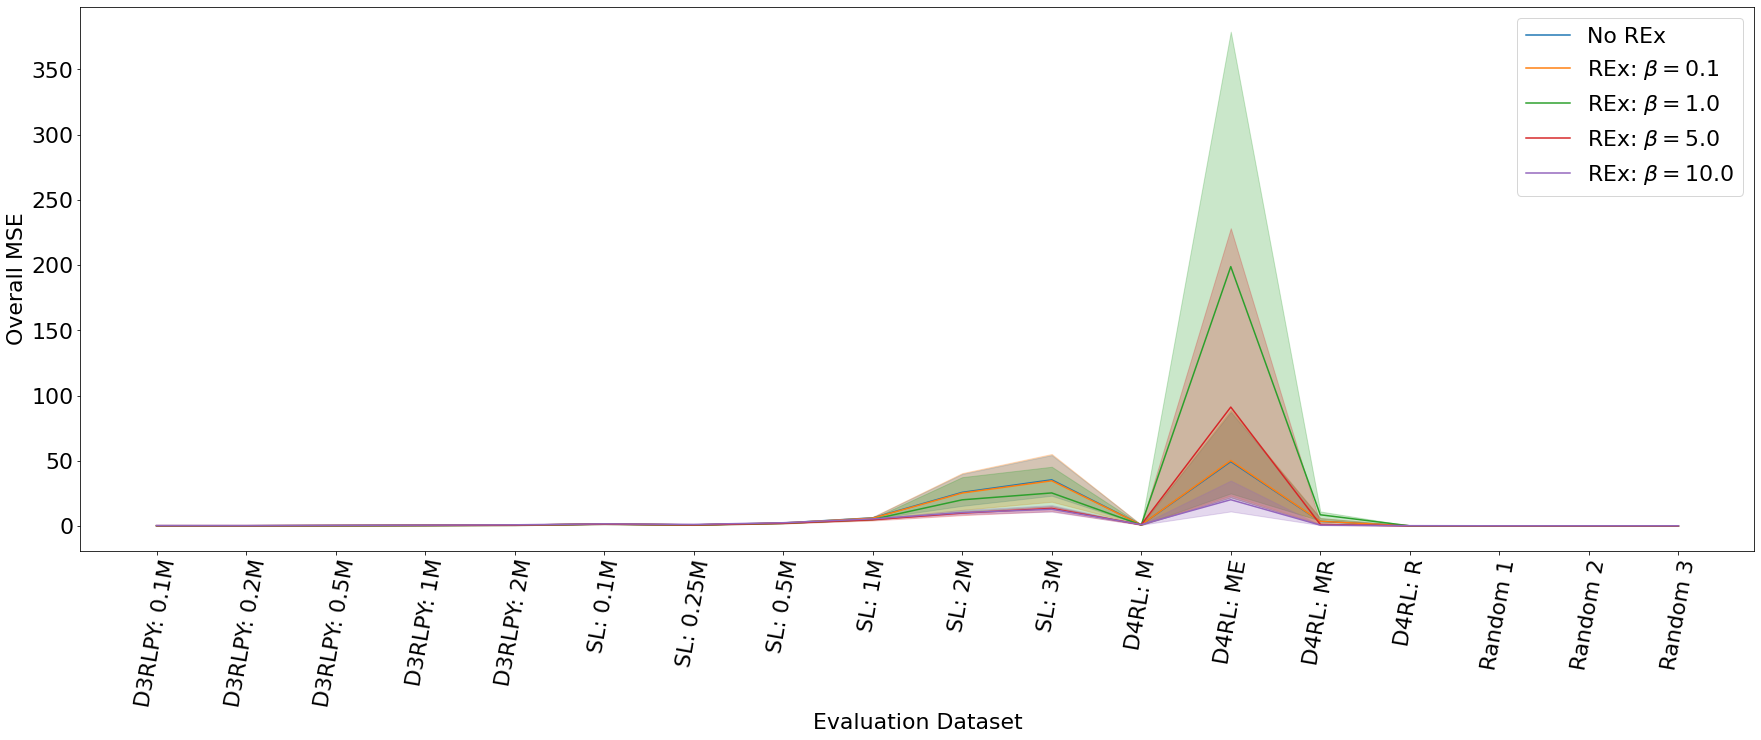

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_rex_01_avgs_df, scores_rex_01_mins_df, scores_rex_01_maxs_df), 
    (scores_rex_1_avgs_df, scores_rex_1_mins_df, scores_rex_1_maxs_df), 
    (scores_rex_5_avgs_df, scores_rex_5_mins_df, scores_rex_5_maxs_df), 
    (scores_rex_10_avgs_df, scores_rex_10_mins_df, scores_rex_10_maxs_df), 
]): #, scores_rex_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

# for i in training_datasets:
#     ax.axvline(i, ls='--', color='r')

ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
ax.legend()

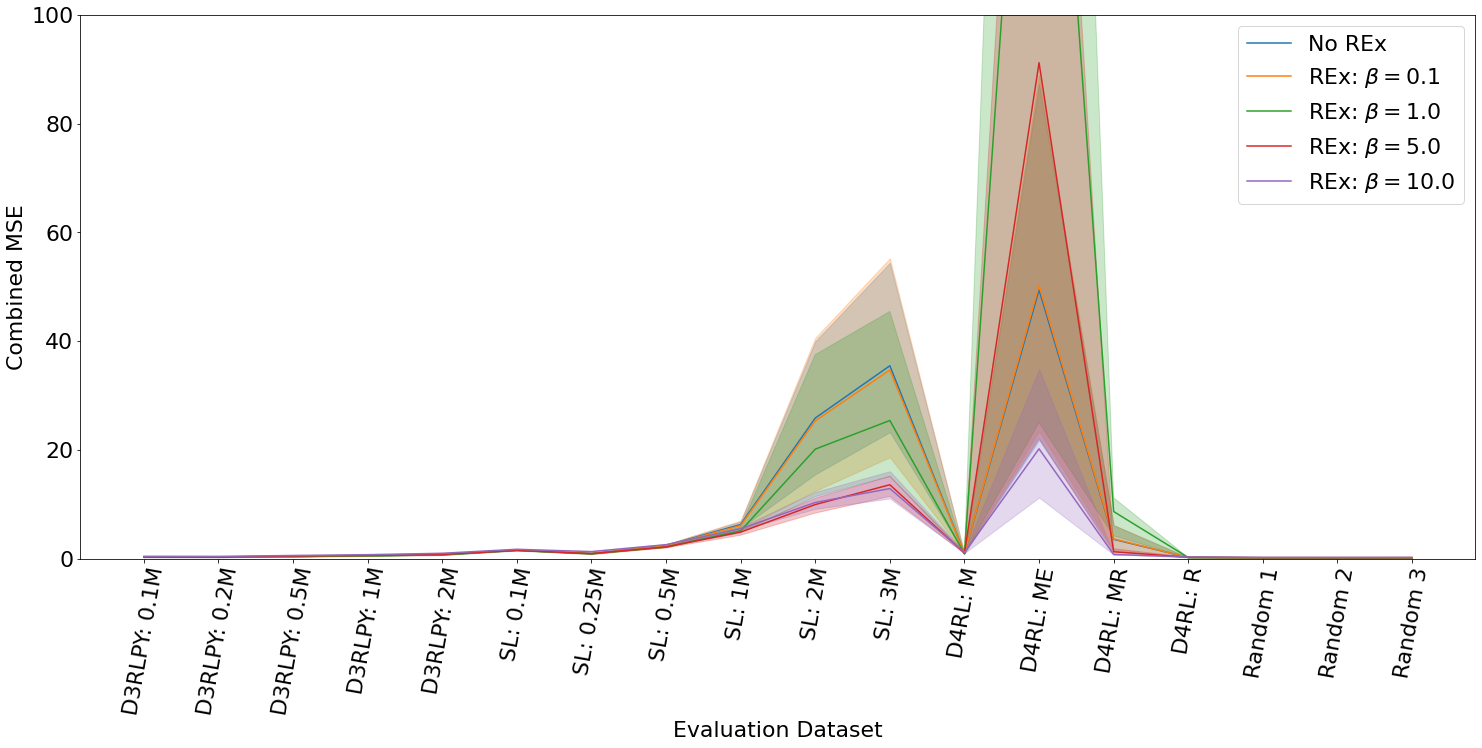

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_rex_01_avgs_df, scores_rex_01_mins_df, scores_rex_01_maxs_df), 
    (scores_rex_1_avgs_df, scores_rex_1_mins_df, scores_rex_1_maxs_df),  
    (scores_rex_5_avgs_df, scores_rex_5_mins_df, scores_rex_5_maxs_df), 
    (scores_rex_10_avgs_df, scores_rex_10_mins_df, scores_rex_10_maxs_df), 
]): #, scores_rex_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

# for i in training_datasets:
#     ax.axvline(i, ls='--', color='r')

ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Combined MSE')
ax.set_ylim(0,100)
ax.legend()

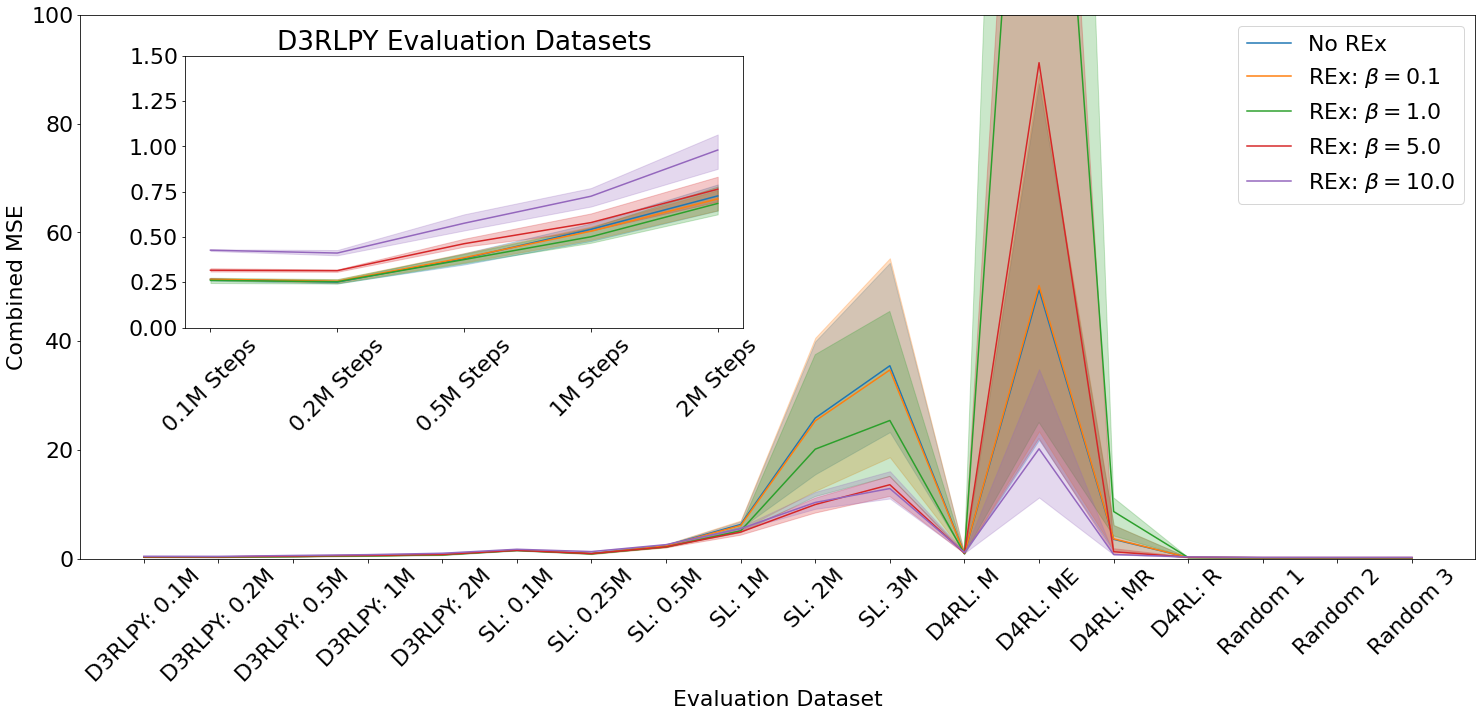

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
ins = ax.inset_axes([0.075,0.425,0.4,0.5])

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_rex_01_avgs_df, scores_rex_01_mins_df, scores_rex_01_maxs_df), 
    (scores_rex_1_avgs_df, scores_rex_1_mins_df, scores_rex_1_maxs_df),  
    (scores_rex_5_avgs_df, scores_rex_5_mins_df, scores_rex_5_maxs_df), 
    (scores_rex_10_avgs_df, scores_rex_10_mins_df, scores_rex_10_maxs_df), 
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[d3rlpy_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[d3rlpy_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[d3rlpy_datasets][metric]
    ins.plot(d3rlpy_datasets, plot_avgs, label=labels[i], c=cols[i])
    ins.fill_between(d3rlpy_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])


ins.set_xticks(ins.get_xticks(), d3rlpy_labels, rotation=45)
ins.set_title('D3RLPY Evaluation Datasets')
ins.set_ylim(0, 1.5)

ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=45)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Combined MSE')
ax.set_ylim(0,100)
ax.legend()

fig.savefig(os.path.join(FIG_DIR, 'ch6', 'novice_overall_mse.png'), pad_inches=0.2, bbox_inches='tight')

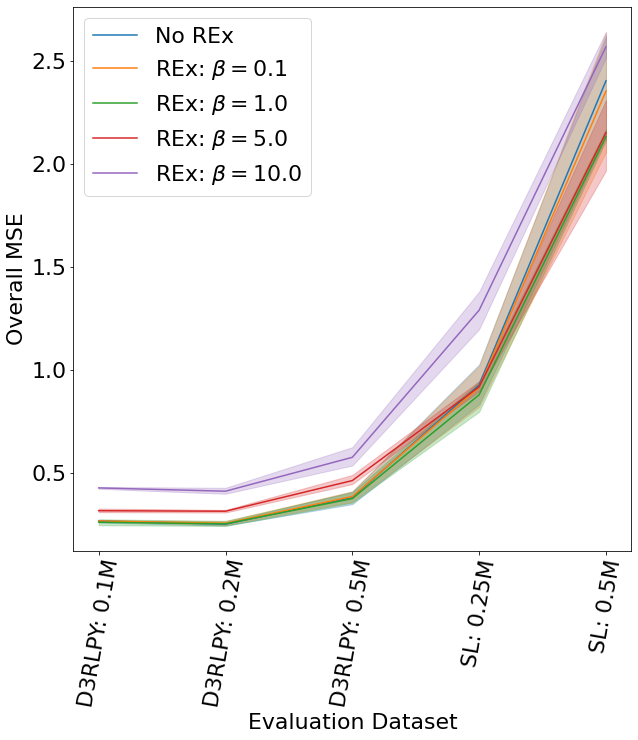

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_rex_01_avgs_df, scores_rex_01_mins_df, scores_rex_01_maxs_df), 
    (scores_rex_1_avgs_df, scores_rex_1_mins_df, scores_rex_1_maxs_df),  
    (scores_rex_5_avgs_df, scores_rex_5_mins_df, scores_rex_5_maxs_df), 
    (scores_rex_10_avgs_df, scores_rex_10_mins_df, scores_rex_10_maxs_df), 
]): #, scores_rex_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[easy_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[easy_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[easy_datasets][metric]
    ax.plot(easy_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(easy_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

# for i in training_datasets:
#     ax.axvline(i, ls='--', color='r')

ax.set_xticks(ax.get_xticks(), easy_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
# ax.set_ylim(0,100)
ax.legend()

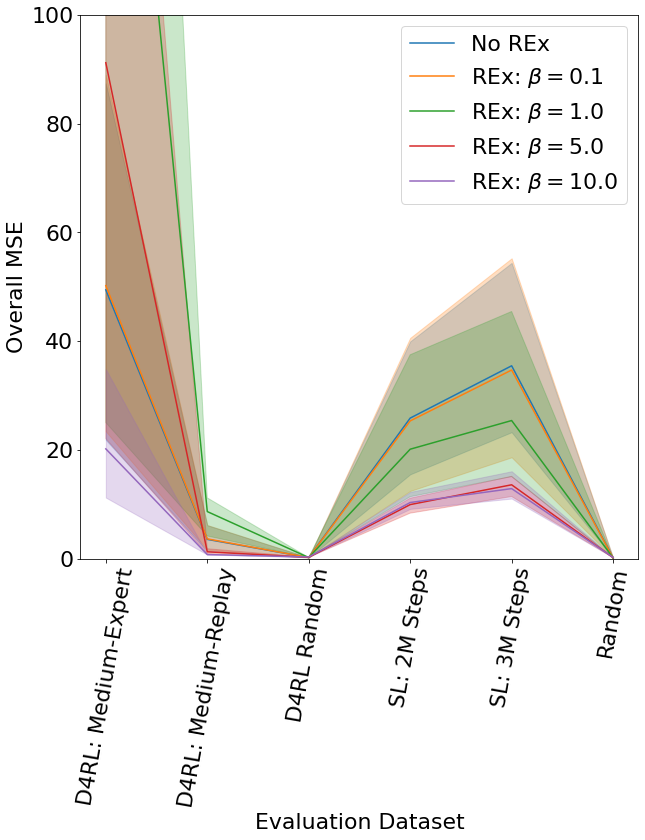

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_rex_01_avgs_df, scores_rex_01_mins_df, scores_rex_01_maxs_df), 
    (scores_rex_1_avgs_df, scores_rex_1_mins_df, scores_rex_1_maxs_df),  
    (scores_rex_5_avgs_df, scores_rex_5_mins_df, scores_rex_5_maxs_df), 
    (scores_rex_10_avgs_df, scores_rex_10_mins_df, scores_rex_10_maxs_df), 
]): #, scores_rex_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[hard_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[hard_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[hard_datasets][metric]
    ax.plot(hard_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(hard_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

# for i in training_datasets:
#     ax.axvline(i, ls='--', color='r')

ax.set_xticks(ax.get_xticks(), hard_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
ax.set_ylim(0,100)
ax.legend()

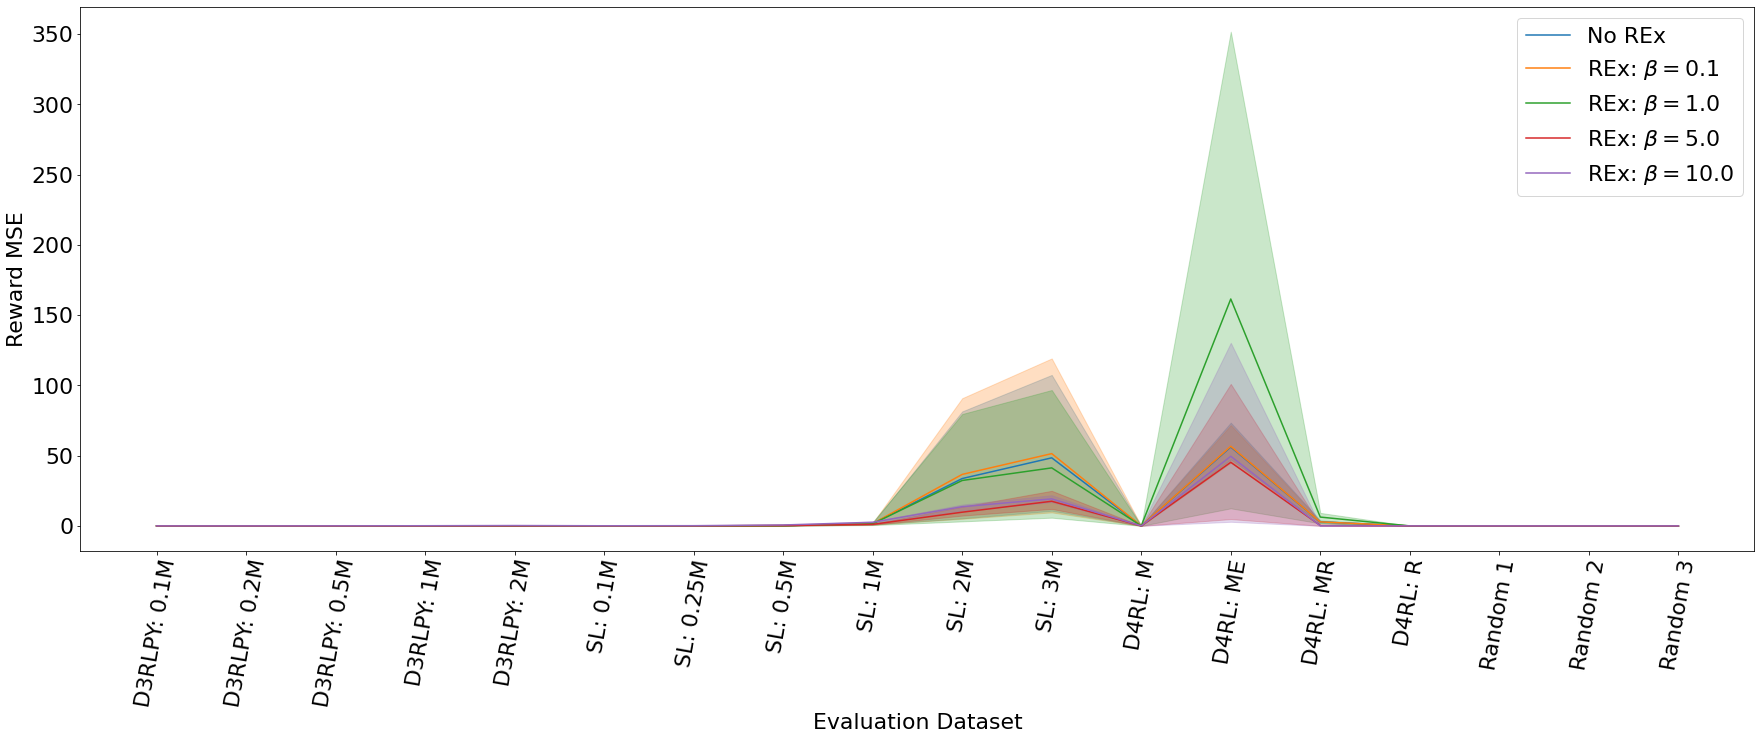

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

metric = 'reward_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_rex_01_avgs_df, scores_rex_01_mins_df, scores_rex_01_maxs_df), 
    (scores_rex_1_avgs_df, scores_rex_1_mins_df, scores_rex_1_maxs_df), 
    (scores_rex_5_avgs_df, scores_rex_5_mins_df, scores_rex_5_maxs_df), 
    (scores_rex_10_avgs_df, scores_rex_10_mins_df, scores_rex_10_maxs_df), 
]): #, scores_rex_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

# for i in training_datasets:
#     ax.axvline(i, ls='--', color='r')

ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Reward MSE')
ax.legend()

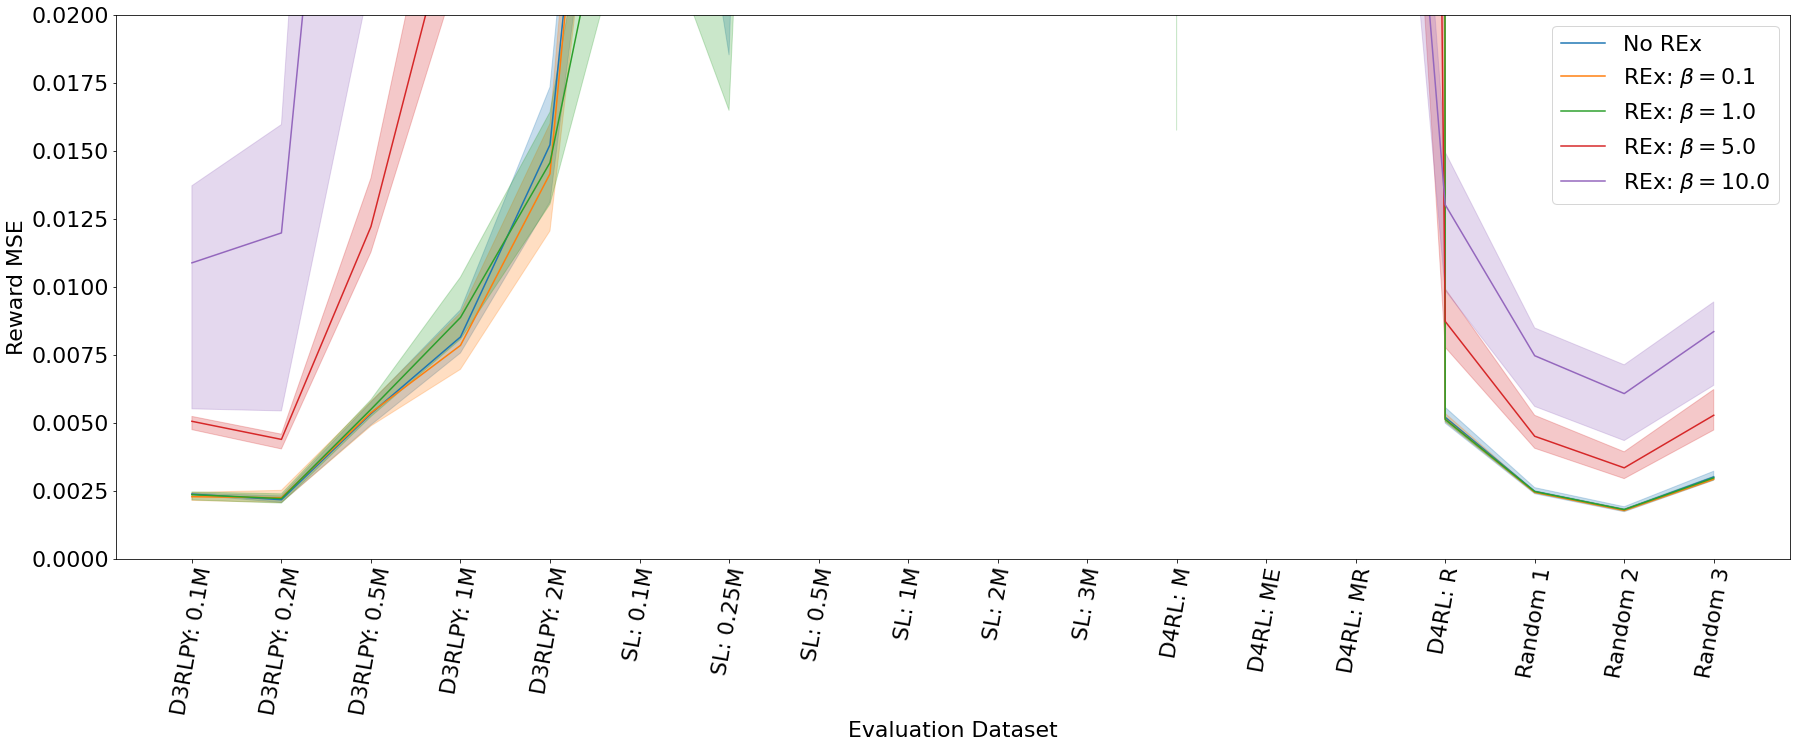

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

metric = 'reward_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_rex_01_avgs_df, scores_rex_01_mins_df, scores_rex_01_maxs_df), 
    (scores_rex_1_avgs_df, scores_rex_1_mins_df, scores_rex_1_maxs_df),  
    (scores_rex_5_avgs_df, scores_rex_5_mins_df, scores_rex_5_maxs_df), 
    (scores_rex_10_avgs_df, scores_rex_10_mins_df, scores_rex_10_maxs_df), 
]): #, scores_rex_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

# for i in training_datasets:
#     ax.axvline(i, ls='--', color='r')

ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Reward MSE')
ax.set_ylim(0,0.02)
ax.legend()

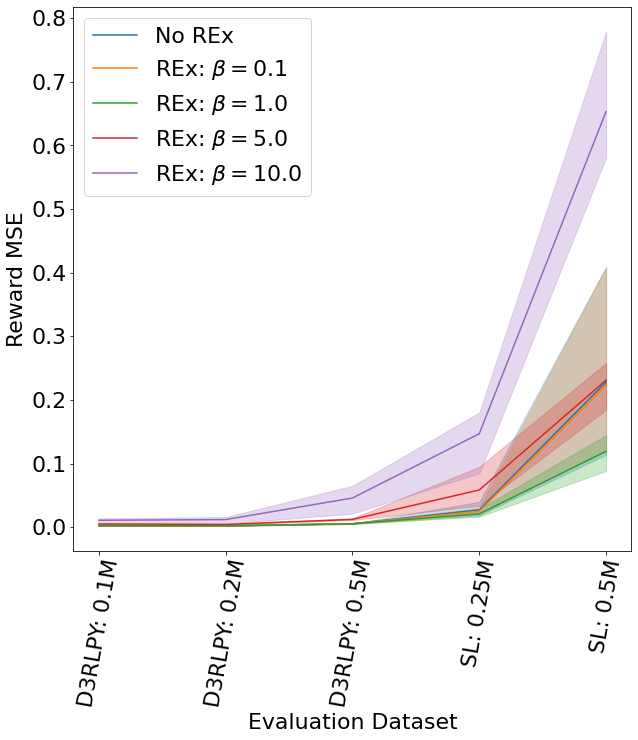

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

metric = 'reward_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_rex_01_avgs_df, scores_rex_01_mins_df, scores_rex_01_maxs_df), 
    (scores_rex_1_avgs_df, scores_rex_1_mins_df, scores_rex_1_maxs_df),  
    (scores_rex_5_avgs_df, scores_rex_5_mins_df, scores_rex_5_maxs_df), 
    (scores_rex_10_avgs_df, scores_rex_10_mins_df, scores_rex_10_maxs_df), 
]): #, scores_rex_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[easy_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[easy_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[easy_datasets][metric]
    ax.plot(easy_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(easy_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

# for i in training_datasets:
#     ax.axvline(i, ls='--', color='r')

ax.set_xticks(ax.get_xticks(), easy_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Reward MSE')
# ax.set_ylim(0,100)
ax.legend()

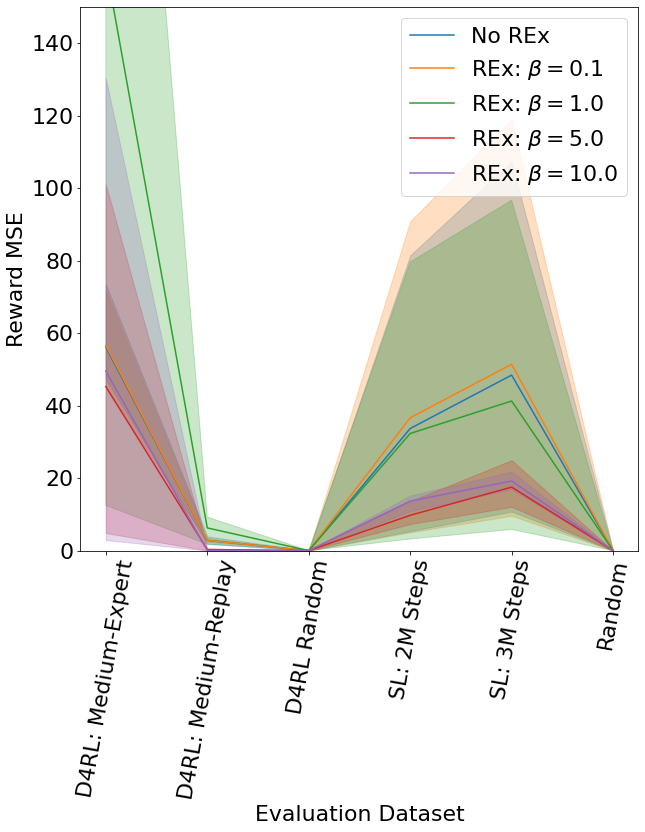

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

metric = 'reward_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_rex_01_avgs_df, scores_rex_01_mins_df, scores_rex_01_maxs_df), 
    (scores_rex_1_avgs_df, scores_rex_1_mins_df, scores_rex_1_maxs_df),  
    (scores_rex_5_avgs_df, scores_rex_5_mins_df, scores_rex_5_maxs_df), 
    (scores_rex_10_avgs_df, scores_rex_10_mins_df, scores_rex_10_maxs_df), 
]): #, scores_rex_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[hard_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[hard_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[hard_datasets][metric]
    ax.plot(hard_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(hard_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

# for i in training_datasets:
#     ax.axvline(i, ls='--', color='r')

ax.set_xticks(ax.get_xticks(), hard_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Reward MSE')
ax.set_ylim(0,150)
ax.legend()

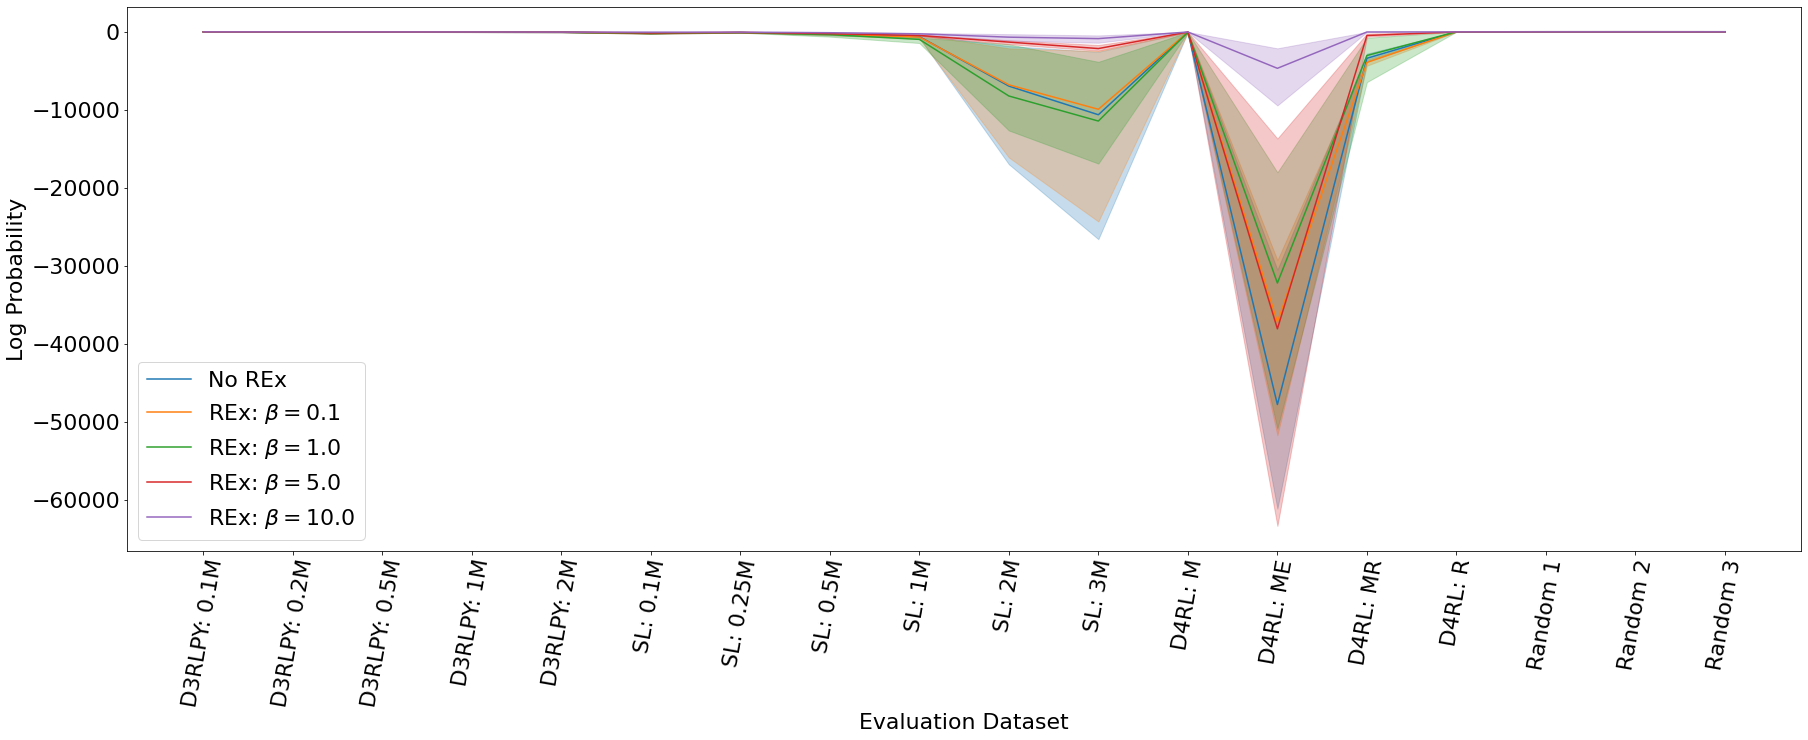

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_rex_01_avgs_df, scores_rex_01_mins_df, scores_rex_01_maxs_df), 
    (scores_rex_1_avgs_df, scores_rex_1_mins_df, scores_rex_1_maxs_df),  
    (scores_rex_5_avgs_df, scores_rex_5_mins_df, scores_rex_5_maxs_df), 
    (scores_rex_10_avgs_df, scores_rex_10_mins_df, scores_rex_10_maxs_df), 
]): #, scores_rex_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

# for i in training_datasets:
#     ax.axvline(i, ls='--', color='r')

ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.legend()

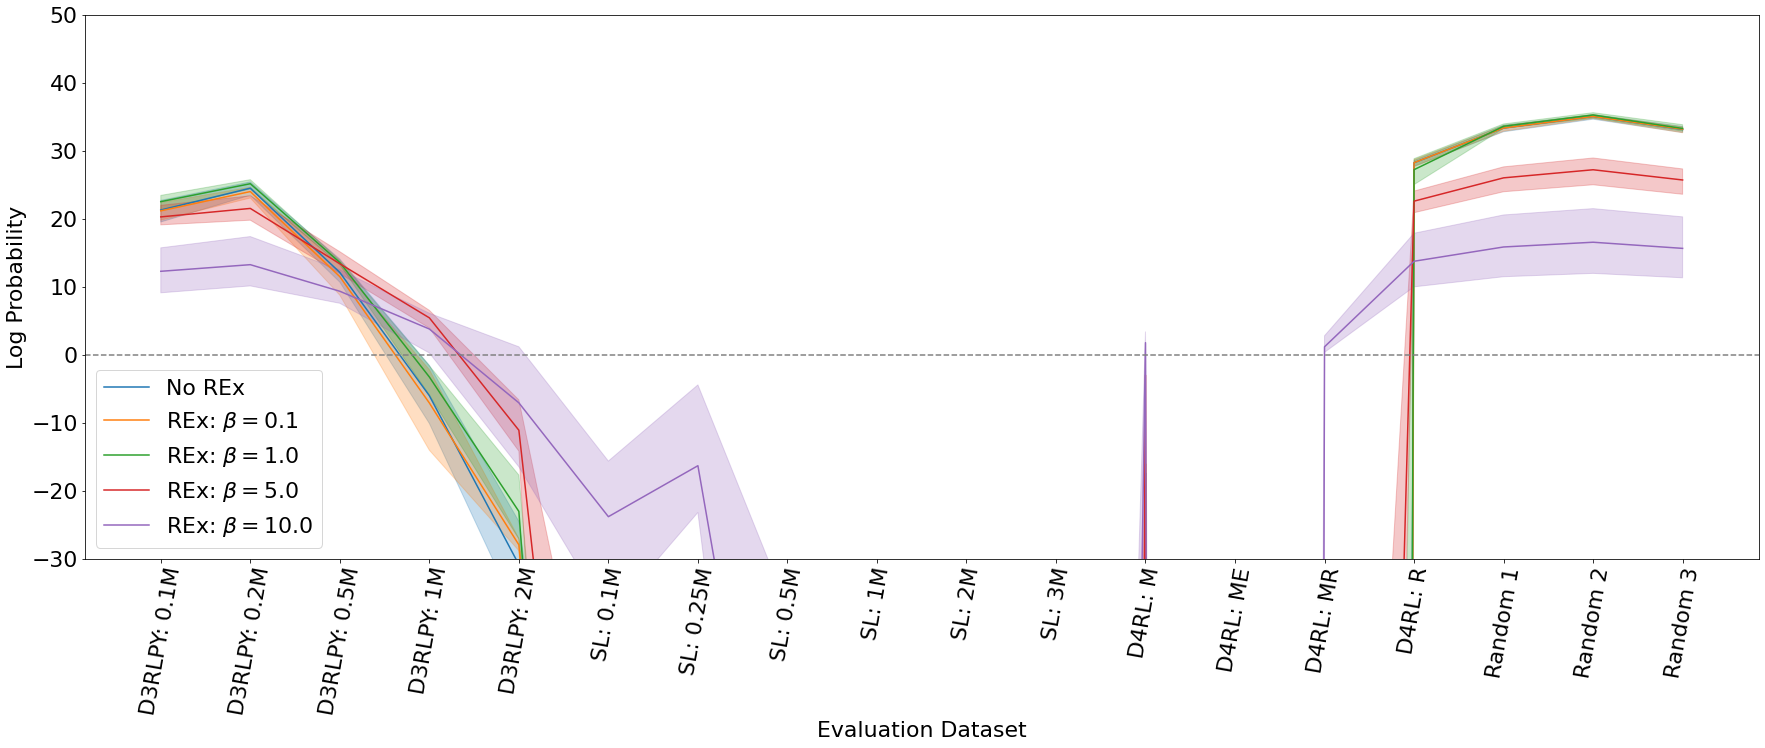

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_rex_01_avgs_df, scores_rex_01_mins_df, scores_rex_01_maxs_df), 
    (scores_rex_1_avgs_df, scores_rex_1_mins_df, scores_rex_1_maxs_df),  
    (scores_rex_5_avgs_df, scores_rex_5_mins_df, scores_rex_5_maxs_df), 
    (scores_rex_10_avgs_df, scores_rex_10_mins_df, scores_rex_10_maxs_df), 
]): #, scores_rex_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

# for i in training_datasets:
#     ax.axvline(i, ls='--', color='r')

ax.axhline(0, ls='--', color='gray')

ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.set_ylim(-30.,50.)
ax.legend()

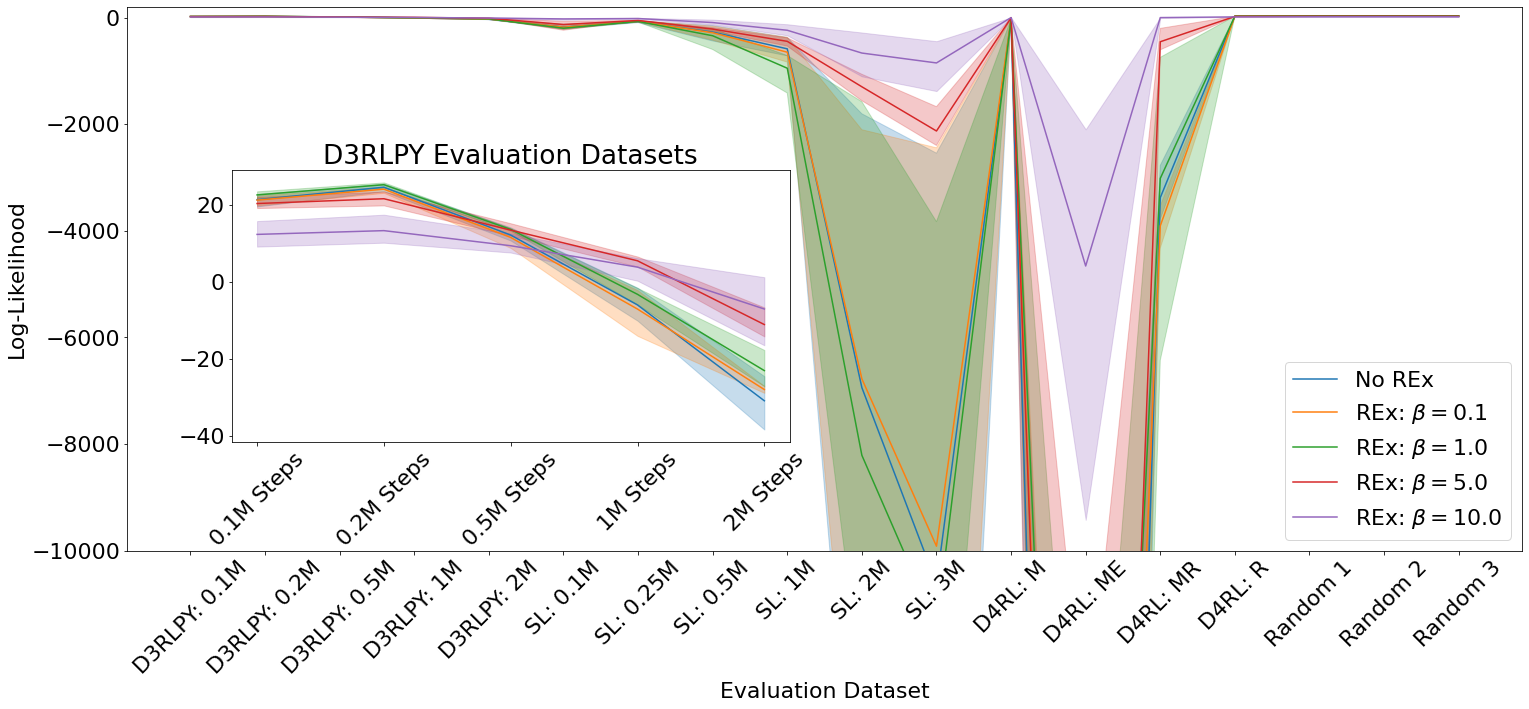

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
ins = ax.inset_axes([0.075,0.2,0.4,0.5])

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_rex_01_avgs_df, scores_rex_01_mins_df, scores_rex_01_maxs_df), 
    (scores_rex_1_avgs_df, scores_rex_1_mins_df, scores_rex_1_maxs_df),  
    (scores_rex_5_avgs_df, scores_rex_5_mins_df, scores_rex_5_maxs_df), 
    (scores_rex_10_avgs_df, scores_rex_10_mins_df, scores_rex_10_maxs_df), 
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[d3rlpy_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[d3rlpy_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[d3rlpy_datasets][metric]
    ins.plot(d3rlpy_datasets, plot_avgs, label=labels[i], c=cols[i])
    ins.fill_between(d3rlpy_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])


ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=45)
ins.set_xticks(ins.get_xticks(), d3rlpy_labels, rotation=45)
ins.set_title('D3RLPY Evaluation Datasets')

ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log-Likelihood')
ax.set_ylim(-10000,200)
ax.legend(loc='lower right')

fig.savefig(os.path.join(FIG_DIR, 'ch6', 'novice_log_likelihood.png'), pad_inches=0.2, bbox_inches='tight')

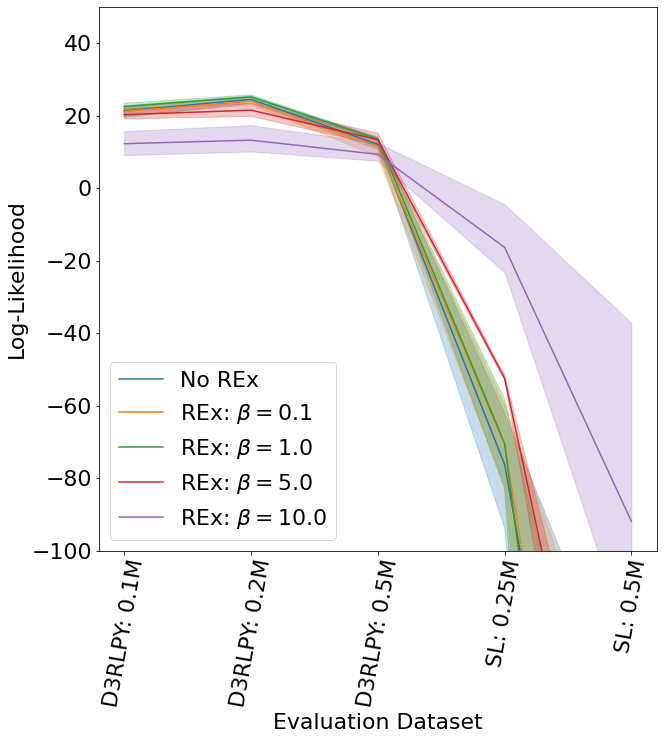

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_rex_01_avgs_df, scores_rex_01_mins_df, scores_rex_01_maxs_df), 
    (scores_rex_1_avgs_df, scores_rex_1_mins_df, scores_rex_1_maxs_df),  
    (scores_rex_5_avgs_df, scores_rex_5_mins_df, scores_rex_5_maxs_df), 
    (scores_rex_10_avgs_df, scores_rex_10_mins_df, scores_rex_10_maxs_df), 
]): #, scores_rex_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[easy_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[easy_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[easy_datasets][metric]
    ax.plot(easy_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(easy_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

# for i in training_datasets:
#     ax.axvline(i, ls='--', color='r')

ax.set_xticks(ax.get_xticks(), easy_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log-Likelihood')
ax.set_ylim(-100,50)
ax.legend()

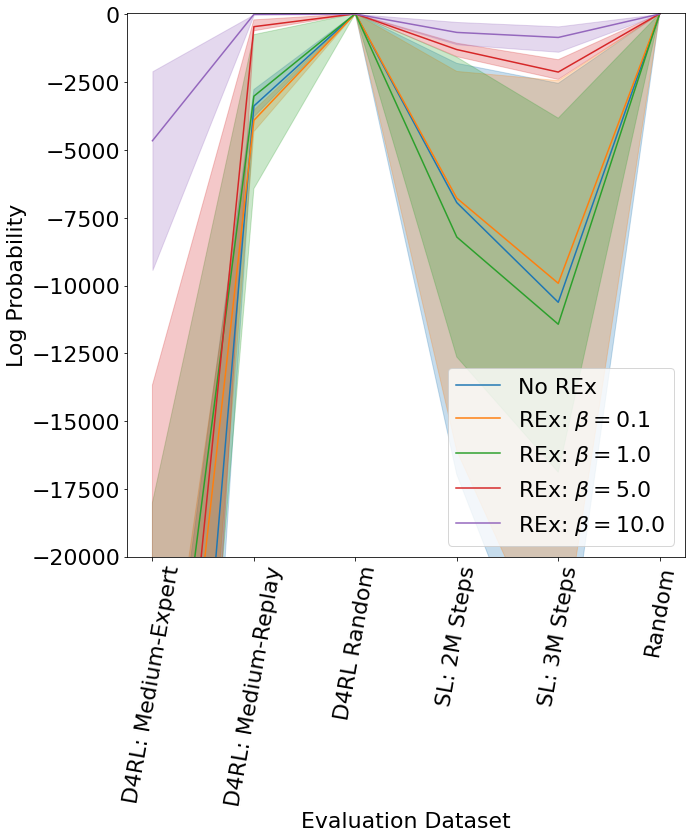

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_rex_01_avgs_df, scores_rex_01_mins_df, scores_rex_01_maxs_df), 
    (scores_rex_1_avgs_df, scores_rex_1_mins_df, scores_rex_1_maxs_df),  
    (scores_rex_5_avgs_df, scores_rex_5_mins_df, scores_rex_5_maxs_df), 
    (scores_rex_10_avgs_df, scores_rex_10_mins_df, scores_rex_10_maxs_df), 
]): #, scores_rex_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[hard_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[hard_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[hard_datasets][metric]
    ax.plot(hard_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(hard_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

# for i in training_datasets:
#     ax.axvline(i, ls='--', color='r')

ax.set_xticks(ax.get_xticks(), hard_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.set_ylim(-20000, 50)
ax.legend()

# Retraining Analysis

In [23]:
retrain_labels = ['No REx - Original Model', 'No REx - 1 Epoch Retraining', 'REx - Beta 10.0 - Original Model', 'REx - Beta 10.0 - 1 Epoch Retraining']

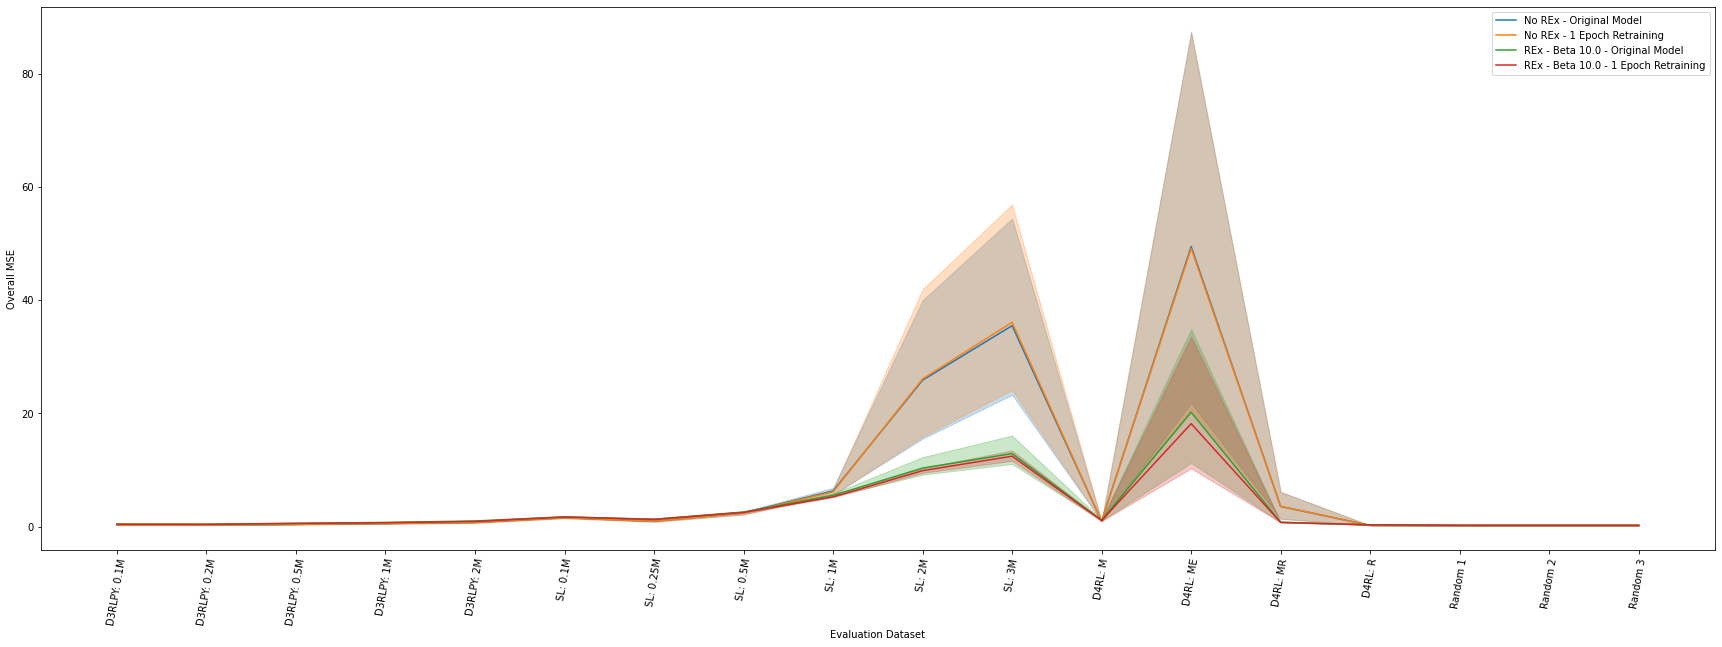

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_no_rex_avgs_df_retrain, scores_no_rex_mins_df_retrain, scores_no_rex_maxs_df_retrain),
    (scores_rex_10_avgs_df, scores_rex_10_mins_df, scores_rex_10_maxs_df), 
    (scores_rex_10_avgs_df_retrain, scores_rex_10_mins_df_retrain, scores_rex_10_maxs_df_retrain), 
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=retrain_labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

# for i in training_datasets:
#     ax.axvline(i, ls='--', color='r')

ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
ax.legend()

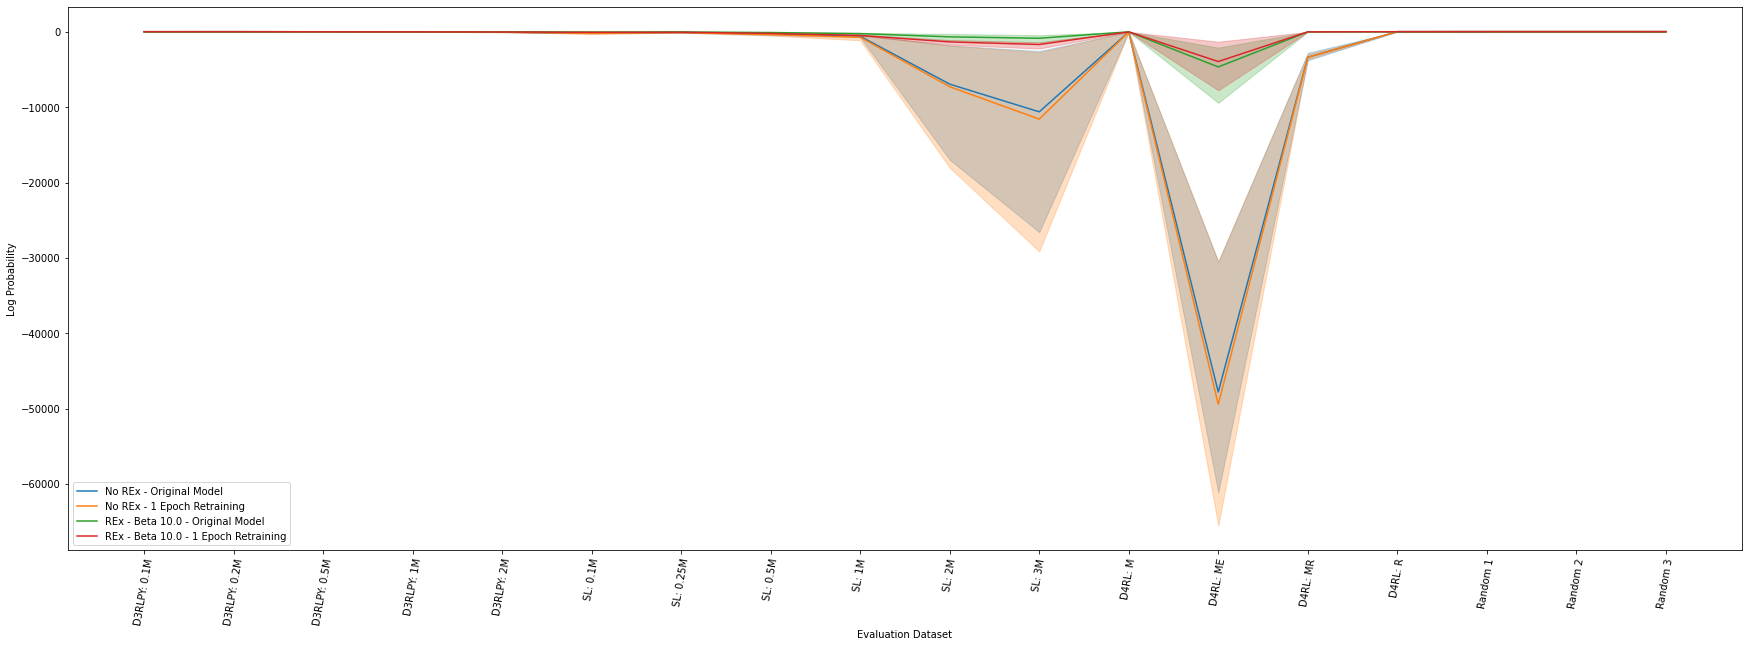

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_no_rex_avgs_df_retrain, scores_no_rex_mins_df_retrain, scores_no_rex_maxs_df_retrain),
    (scores_rex_10_avgs_df, scores_rex_10_mins_df, scores_rex_10_maxs_df), 
    (scores_rex_10_avgs_df_retrain, scores_rex_10_mins_df_retrain, scores_rex_10_maxs_df_retrain), 
]): #, scores_rex_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=retrain_labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

# for i in training_datasets:
#     ax.axvline(i, ls='--', color='r')

ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.legend()

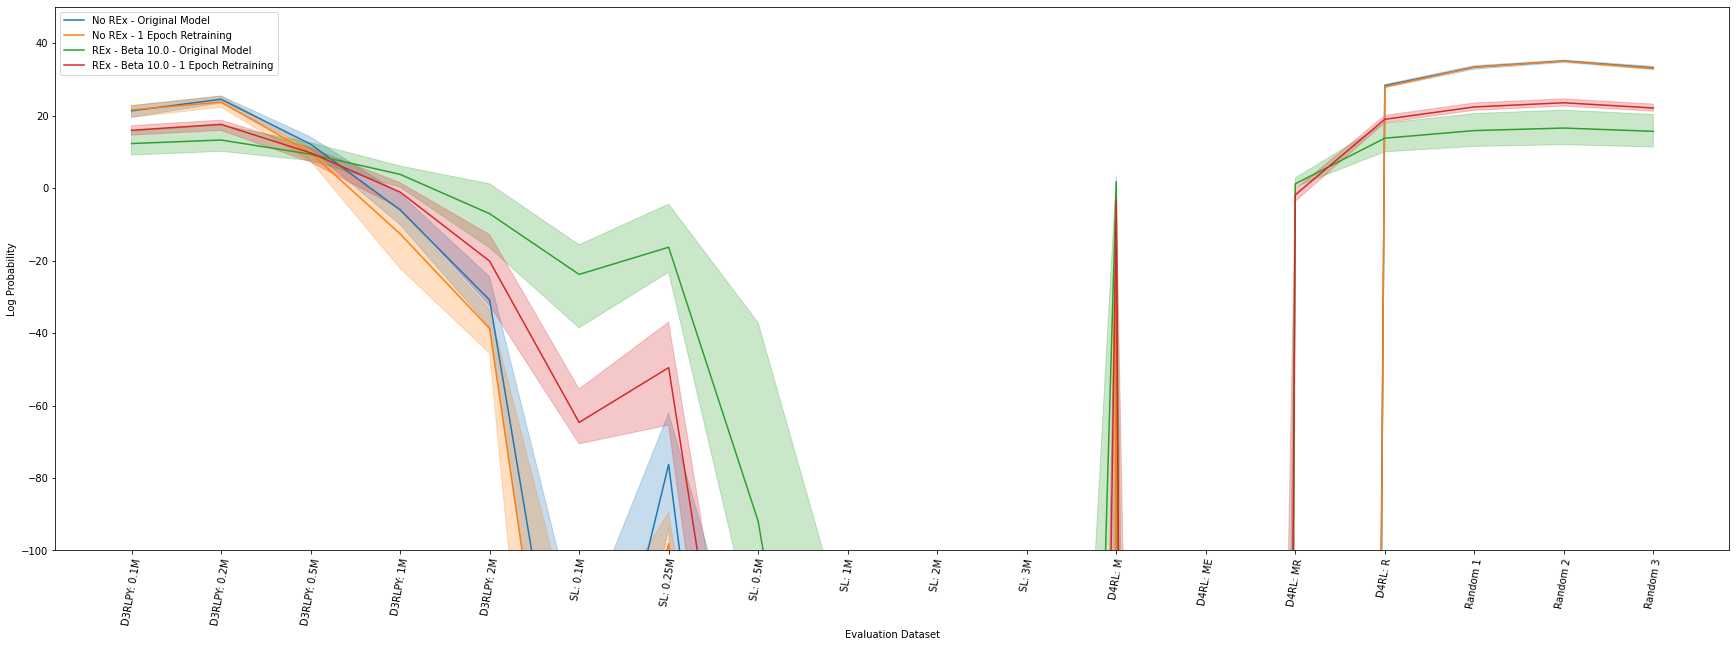

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_no_rex_avgs_df_retrain, scores_no_rex_mins_df_retrain, scores_no_rex_maxs_df_retrain),
    (scores_rex_10_avgs_df, scores_rex_10_mins_df, scores_rex_10_maxs_df), 
    (scores_rex_10_avgs_df_retrain, scores_rex_10_mins_df_retrain, scores_rex_10_maxs_df_retrain), 
]): #, scores_rex_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=retrain_labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

# for i in training_datasets:
#     ax.axvline(i, ls='--', color='r')

ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.set_ylim(-100,50)
ax.legend()

# Wasserstein Distance

In [27]:
wd_no_rex_arr = experiment_combination_distances(experiments_no_rex, evaluation_datasets)
wd_rex_01_arr = experiment_combination_distances(experiments_rex_01, evaluation_datasets)
wd_rex_1_arr = experiment_combination_distances(experiments_rex_1, evaluation_datasets)
wd_rex_5_arr = experiment_combination_distances(experiments_rex_5, evaluation_datasets)
wd_rex_10_arr = experiment_combination_distances(experiments_rex_10, evaluation_datasets)

In [28]:
wd_no_rex_arr_retrain = experiment_combination_distances(experiments_no_rex_retrain, evaluation_datasets)
wd_rex_10_arr_retrain = experiment_combination_distances(experiments_rex_10_retrain, evaluation_datasets)

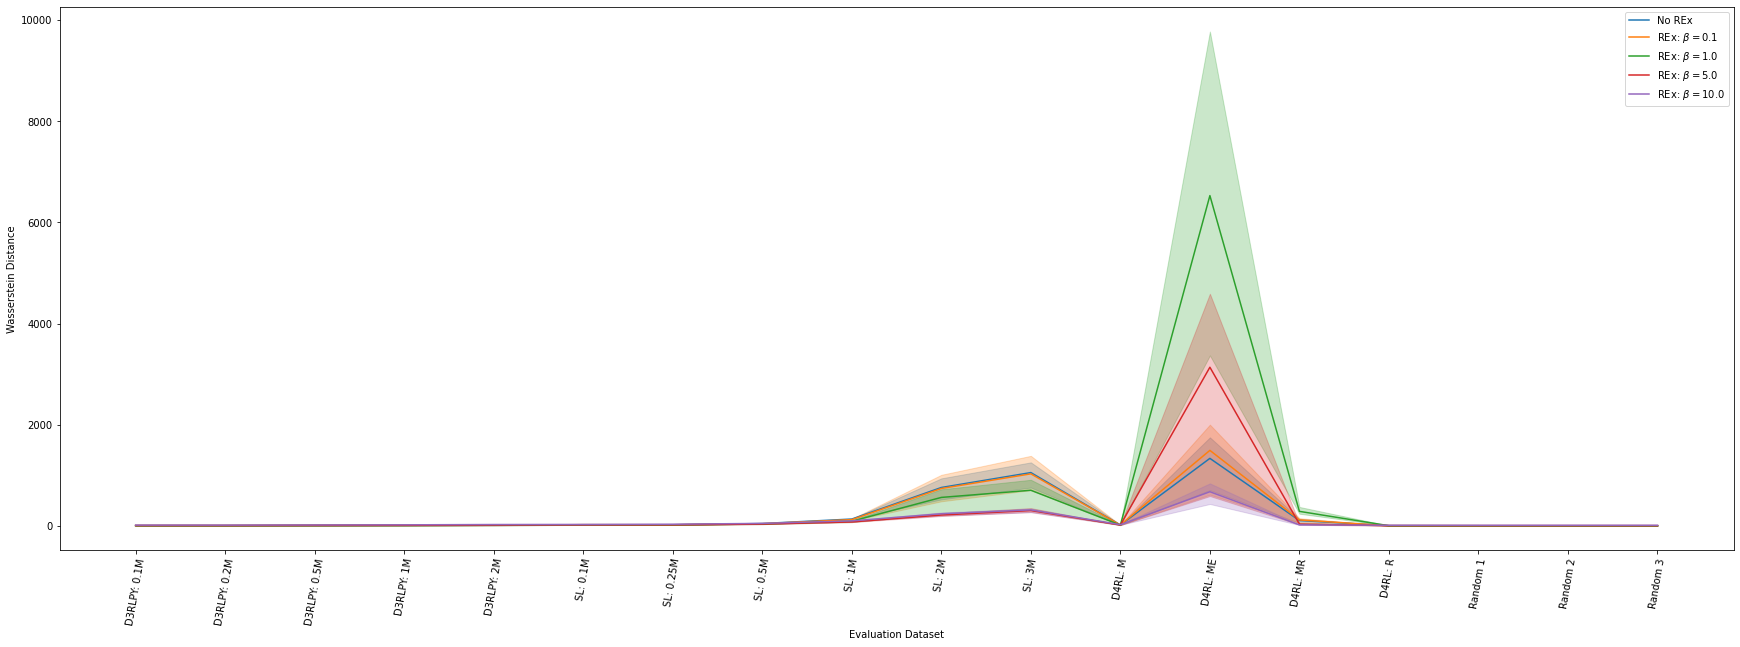

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

for i, wd_arr in enumerate([
    wd_no_rex_arr,
    wd_rex_01_arr,
    wd_rex_1_arr,
    wd_rex_5_arr,
    wd_rex_10_arr,
]):
    plot_avgs = wd_arr.mean(axis=0)
    plot_mins = wd_arr.min(axis=0)
    plot_maxs = wd_arr.max(axis=0)
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
    ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=80)
    ax.set_xlabel('Evaluation Dataset')
    ax.set_ylabel('Wasserstein Distance')
    ax.legend()

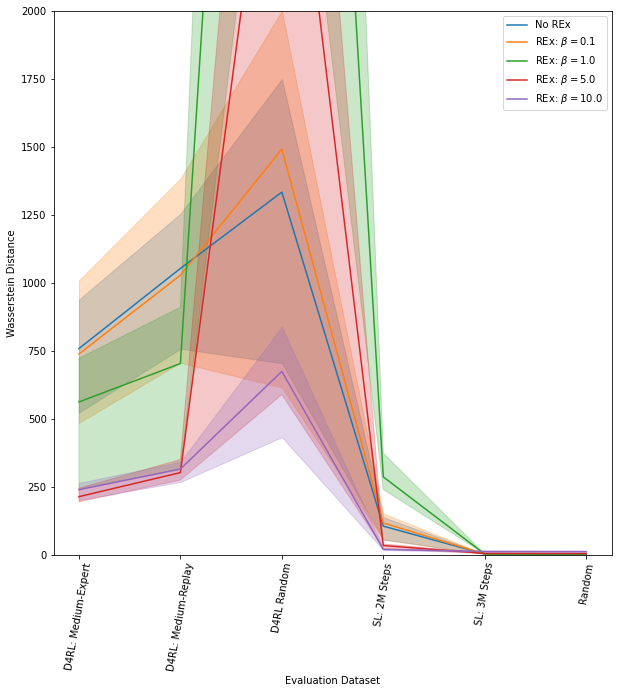

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for i, wd_arr in enumerate([
    wd_no_rex_arr,
    wd_rex_01_arr,
    wd_rex_1_arr,
    wd_rex_5_arr,
    wd_rex_10_arr,
]):
    plot_avgs = wd_arr.mean(axis=0)
    plot_mins = wd_arr.min(axis=0)
    plot_maxs = wd_arr.max(axis=0)
    ds_ind = np.isin(np.array(evaluation_datasets), hard_datasets)
    ax.plot(hard_datasets, plot_avgs[ds_ind], label=labels[i], c=cols[i])
    ax.fill_between(hard_datasets, plot_mins[ds_ind], plot_maxs[ds_ind], alpha=0.25, color=cols[i])
    ax.set_xticks(ax.get_xticks(), hard_labels, rotation=80)
    ax.set_xlabel('Evaluation Dataset')
    ax.set_ylabel('Wasserstein Distance')
    ax.set_ylim(0,2000)
    ax.legend()

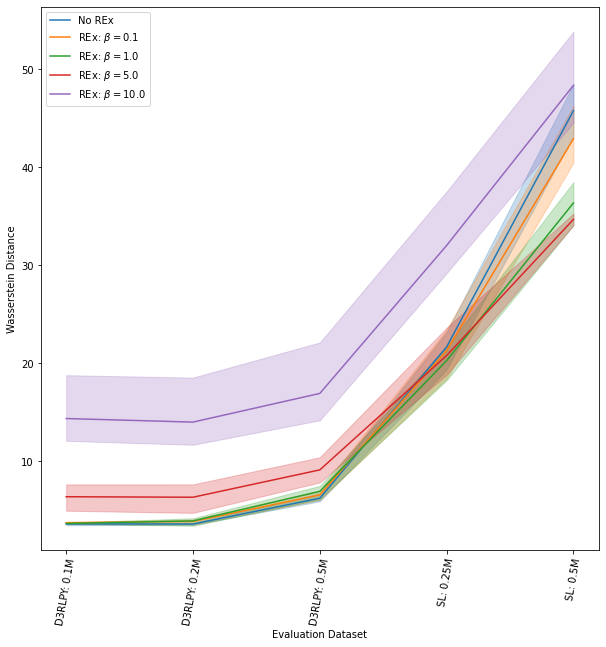

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for i, wd_arr in enumerate([
    wd_no_rex_arr,
    wd_rex_01_arr,
    wd_rex_1_arr,
    wd_rex_5_arr,
    wd_rex_10_arr,
]):
    plot_avgs = wd_arr.mean(axis=0)
    plot_mins = wd_arr.min(axis=0)
    plot_maxs = wd_arr.max(axis=0)
    ds_ind = np.isin(np.array(evaluation_datasets), easy_datasets)
    ax.plot(easy_datasets, plot_avgs[ds_ind], label=labels[i], c=cols[i])
    ax.fill_between(easy_datasets, plot_mins[ds_ind], plot_maxs[ds_ind], alpha=0.25, color=cols[i])
    ax.set_xticks(ax.get_xticks(), easy_labels, rotation=80)
    ax.set_xlabel('Evaluation Dataset')
    ax.set_ylabel('Wasserstein Distance')
    ax.legend()

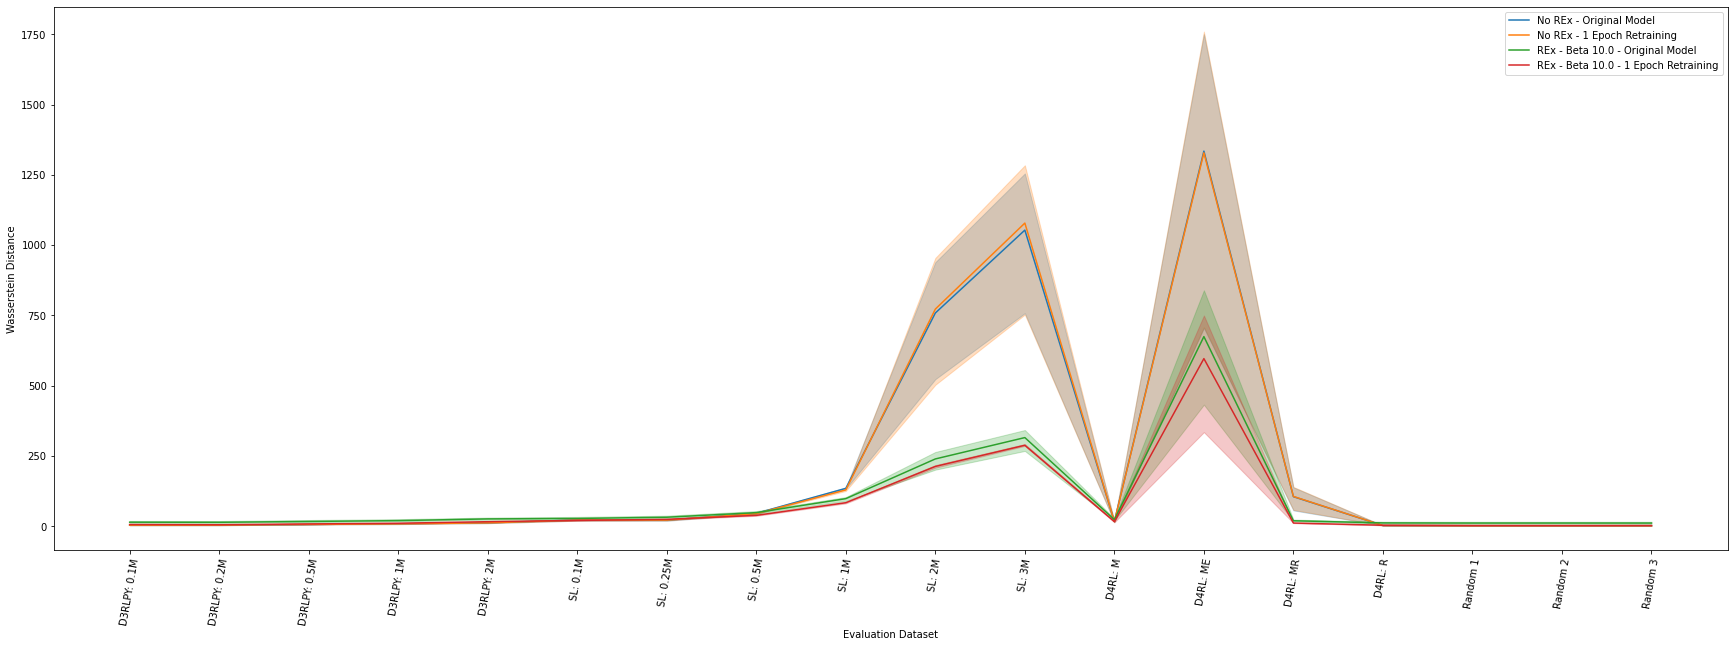

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

for i, wd_arr in enumerate([
    wd_no_rex_arr,
    wd_no_rex_arr_retrain,
    wd_rex_10_arr,
    wd_rex_10_arr_retrain,
]):
    plot_avgs = wd_arr.mean(axis=0)
    plot_mins = wd_arr.min(axis=0)
    plot_maxs = wd_arr.max(axis=0)
    ax.plot(evaluation_datasets, plot_avgs, label=retrain_labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
    ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=80)
    ax.set_xlabel('Evaluation Dataset')
    ax.set_ylabel('Wasserstein Distance')
    ax.legend()

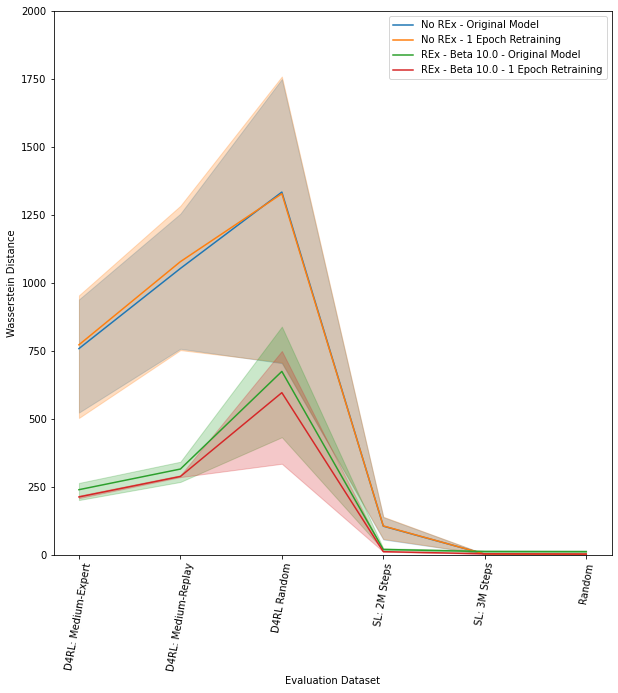

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for i, wd_arr in enumerate([
    wd_no_rex_arr,
    wd_no_rex_arr_retrain,
    wd_rex_10_arr,
    wd_rex_10_arr_retrain,
]):
    plot_avgs = wd_arr.mean(axis=0)
    plot_mins = wd_arr.min(axis=0)
    plot_maxs = wd_arr.max(axis=0)
    ds_ind = np.isin(np.array(evaluation_datasets), hard_datasets)
    ax.plot(hard_datasets, plot_avgs[ds_ind], label=retrain_labels[i], c=cols[i])
    ax.fill_between(hard_datasets, plot_mins[ds_ind], plot_maxs[ds_ind], alpha=0.25, color=cols[i])
    ax.set_xticks(ax.get_xticks(), hard_labels, rotation=80)
    ax.set_xlabel('Evaluation Dataset')
    ax.set_ylabel('Wasserstein Distance')
    ax.set_ylim(0,2000)
    ax.legend()

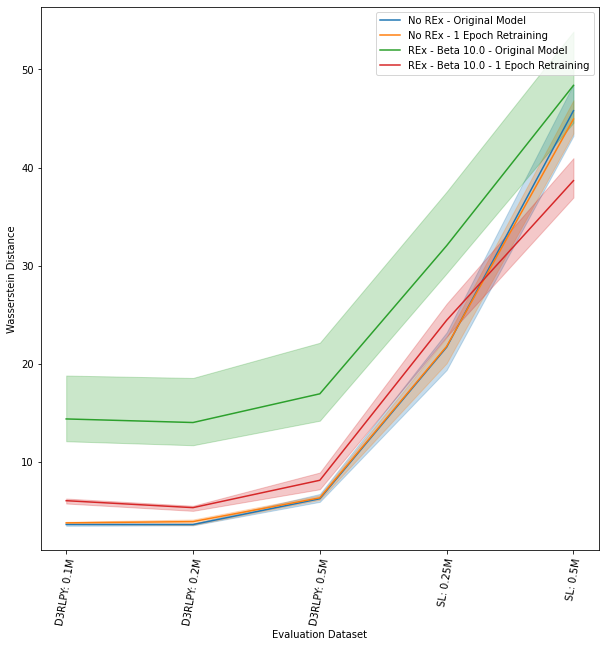

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for i, wd_arr in enumerate([
    wd_no_rex_arr,
    wd_no_rex_arr_retrain,
    wd_rex_10_arr,
    wd_rex_10_arr_retrain,
]):
    plot_avgs = wd_arr.mean(axis=0)
    plot_mins = wd_arr.min(axis=0)
    plot_maxs = wd_arr.max(axis=0)
    ds_ind = np.isin(np.array(evaluation_datasets), easy_datasets)
    ax.plot(easy_datasets, plot_avgs[ds_ind], label=retrain_labels[i], c=cols[i])
    ax.fill_between(easy_datasets, plot_mins[ds_ind], plot_maxs[ds_ind], alpha=0.25, color=cols[i])
    ax.set_xticks(ax.get_xticks(), easy_labels, rotation=80)
    ax.set_xlabel('Evaluation Dataset')
    ax.set_ylabel('Wasserstein Distance')
    ax.legend()